In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


Text(0.5, 1.0, 'Top 5 most listed product categories')

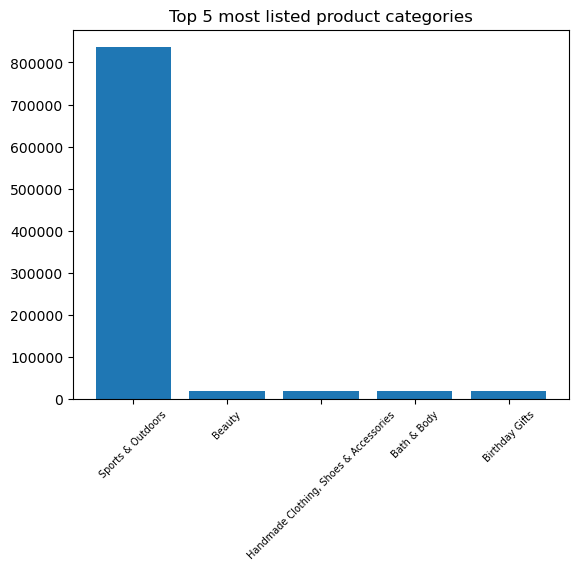

In [4]:
ft_category = df["category"].value_counts().reset_index()
ft_category_top = ft_category.head(5)

plt.bar(ft_category_top["category"], ft_category_top["count"])
plt.xticks(rotation = 45, fontsize = 7)
plt.title("Top 5 most listed product categories")

([<matplotlib.patches.Wedge at 0x2c08feb3af0>,
 [Text(-1.0619894641325325, 0.2866677136886831, ''),
  Text(0.9852466974708041, -0.48917169288796164, ''),
  Text(1.0412846831644893, -0.3545789173188805, ''),
  Text(1.0788687885174035, -0.21457431617737963, ''),
  Text(1.0976547688734235, -0.07179142267312413, '')],
 [Text(-0.5792669804359267, 0.15636420746655438, '91.6%'),
  Text(0.5374072895295294, -0.2668209233934336, '2.1%'),
  Text(0.5679734635442668, -0.19340668217393484, '2.1%'),
  Text(0.5884738846458565, -0.1170405360967525, '2.1%'),
  Text(0.5987207830218674, -0.03915895782170407, '2.1%')])

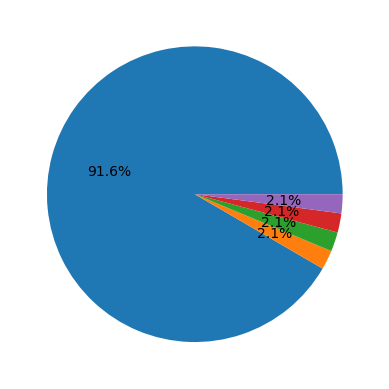

In [5]:
plt.pie(ft_category_top["count"], autopct='%1.1f%%')

In [14]:
df["price"].mean()
df["price"].mode()
df["price"].median()

89.24380943923663

In [29]:
df["price"].var()
df["price"].std()
price_range = df["price"]. max() - df["price"].min()
price_iqr = df["price"].quantile(0.75) - df["price"].quantile(0.25)

(array([2.443482e+06, 1.560000e+02, 1.100000e+01, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000., 100000.]),
 <BarContainer object of 10 artists>)

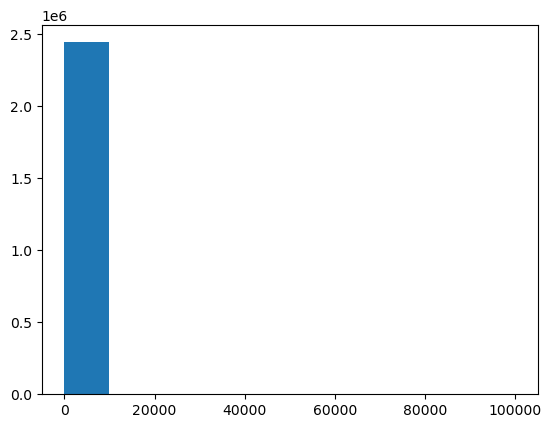

In [35]:
plt.hist(df["price"])

#removing outliers, bins could be reformulated

{'whiskers': [<matplotlib.lines.Line2D at 0x2c08feea7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c08feead60>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c08feea550>],
 'medians': [<matplotlib.lines.Line2D at 0x2c08fefc2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c08fefc580>],
 'means': []}

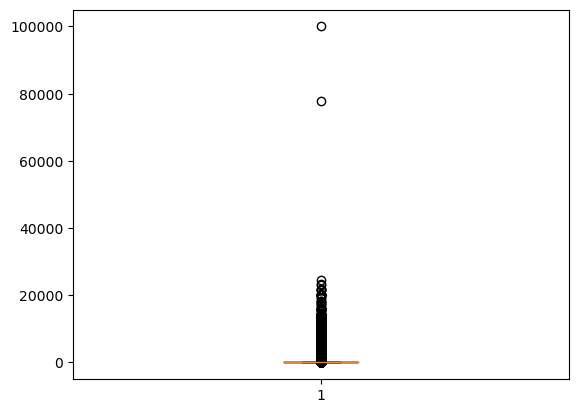

In [36]:
plt.boxplot(df["price"])

In [44]:
df_stars = df[df["stars"] != 0]
df_stars["stars"].var()
df_stars["stars"].std()
stars_range = df["stars"]. max() - df["stars"].min()
stars_iqr = df["stars"].quantile(0.75) - df["stars"].quantile(0.25)

In [45]:
df_stars["stars"].mean()
df_stars["stars"].median()
df_stars["stars"].mode()

0    4.5
Name: stars, dtype: float64

In [48]:
skewness = stats.skew(df_stars["stars"])
skewness
kurtosis = stats.kurtosis(df_stars['stars'])
kurtosis

9.781892609238655

(array([  8588.,    877.,   4990.,   4499.,   9330.,  41893.,  79905.,
        167759., 487177., 412992.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

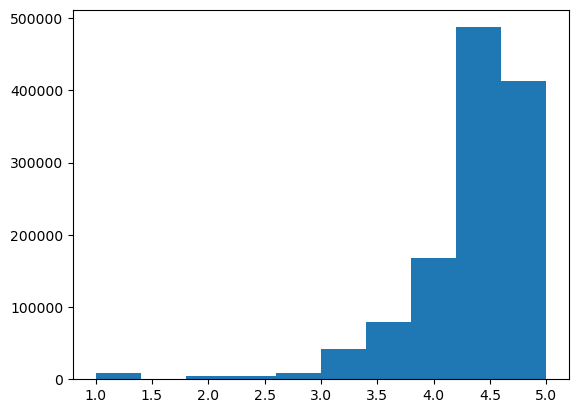

In [49]:
plt.hist(df_stars["stars"])